<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ml/%D0%A2%D0%B5%D0%BC%D0%B0_1_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Тема 1. Введение в нейронные сети
##1. От регрессии к нейросети

Рассмотрим переход от линейной регрессии к нейронным сетям.





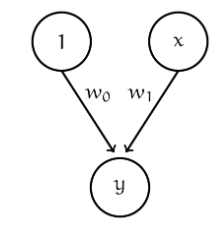

 Представим, что наблюдается графическое представление линейной регрессии, выраженной уравнением:  
$$y = w_0 + w_1 \cdot x.$$
Это стандартная формула, где $y$ зависит линейно от $x$. Теперь возникает вопрос: как можно модифицировать эту модель, чтобы сделать зависимость нелинейной?


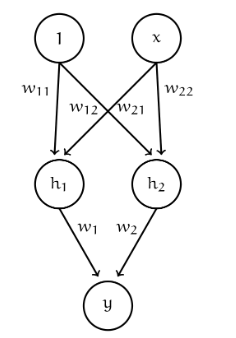


Для иллюстрации введём промежуточные вычисления через скрытые слои. Пусть скрытый слой представлен двумя нейронами, а их выходы обозначены как $h_1$ и $h_2$. Эти величины рассчитываются следующим образом:  
$$h_1 = w_{11} \cdot 1 + w_{21} \cdot x,$$
$$h_2 = w_{12} \cdot 1 + w_{22} \cdot x.$$
Итоговое значение $y$ вычисляется с использованием этих промежуточных величин:  
$$y = w_1 \cdot h_1 + w_2 \cdot h_2.$$

Подставляя выражения для $h_1$ и $h_2$, получаем:  
$$y = w_1 \cdot (w_{11} + w_{21} \cdot x) + w_2 \cdot (w_{12} + w_{22} \cdot x).$$
Раскрывая скобки:  
$$y = (w_1 w_{11} + w_2 w_{12}) + (w_1 w_{21} + w_2 w_{22}) \cdot x.$$

Таким образом, это уравнение всё ещё представляет собой линейную зависимость, несмотря на введение скрытого слоя. Чтобы сделать модель нелинейной, необходимо применить к промежуточным величинам $h_i$ нелинейную функцию. Например, можно использовать сигмоиду:  
$$f(h) = \frac{1}{1 + e^{-h}}.$$

Тогда итоговая формула будет выглядеть так:  
$$y = w_1 \cdot f(w_{11} + w_{21} \cdot x) + w_2 \cdot f(w_{12} + w_{22} \cdot x).$$

Применение функции активации устраняет линейность. Таким образом, преобразование линейной регрессии в нейронную сеть достигается за счёт добавления скрытого слоя и применения к его выходам функции активации.

Для функций активации могут использоваться разные варианты. Одной из популярных в современных нейронных сетях является ReLU (Rectified Linear Unit):  
$$\text{ReLU}(h) = \max(0, h).$$

Эта функция нелинейна и вычисляется просто. Кроме того, она обладает рядом полезных свойств, которые будут подробно рассмотрены в дальнейших материалах.



##2. От картинки к формуле

Рассмотрим процесс прогнозирования заполняемости кофейни с использованием нейронной сети. Модель принимает три входных параметра: температуру за окном ($x_1$), факт наличия митинга на улице ($x_2$) и пол бариста ($x_3$), где мужчина обозначается как $0$, а женщина как $1$. В качестве функции активации используется ReLU (Rectified Linear Unit):  
$$\text{ReLU}(h) = \max(0, h).$$



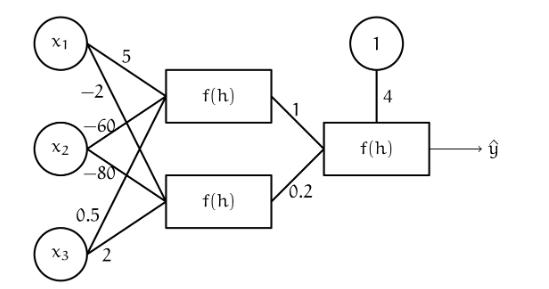


#### Пример прогноза

Для заданных условий:  
- $x_1 = 20$ (температура 20 градусов),  
- $x_2 = 0$ (митинга нет),  
- $x_3 = 1$ (за стойкой стоит женщина),  

выполним поэтапные вычисления для каждого слоя нейронной сети.  





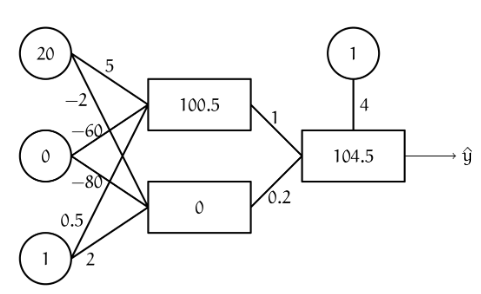


1. **Вычисление значений скрытого слоя**  
   Для первого нейрона:  
   $$
   h_1 = \text{ReLU}(5 \cdot x_1 + (-60) \cdot x_2 + 0.5 \cdot x_3) = \text{ReLU}(5 \cdot 20 + (-60) \cdot 0 + 0.5 \cdot 1) = \text{ReLU}(100.5) = 100.5.
  $$
   Для второго нейрона:  
   $$
   h_2 = \text{ReLU}(-2 \cdot x_1 + (-80) \cdot x_2 + 2 \cdot x_3) = \text{ReLU}(-2 \cdot 20 + (-80) \cdot 0 + 2 \cdot 1) = \text{ReLU}(-38) = 0.
  $$

2. **Выходной слой**  
   Итоговое значение прогнозируется по формуле:  
   $$
   \hat{y} = \text{ReLU}(1 \cdot h_1 + 0.2 \cdot h_2 + 4 \cdot 1).
  $$
   Подставляя значения $h_1$ и $h_2$:  
   $$
   \hat{y} = \text{ReLU}(1 \cdot 100.5 + 0.2 \cdot 0 + 4 \cdot 1) = \text{ReLU}(104.5) = 104.5.
  $$

Таким образом, прогнозируемое число посетителей в кофейне составляет $104.5$.  





#### Нейросеть как функция

Нейронная сеть, по сути, представляет собой нелинейную функцию, которую можно записать аналитически. Построим её пошагово, начиная с выходного слоя:  
$$
\hat{y} = f(1 \cdot h_1 + 0.2 \cdot h_2 + 4 \cdot 1),
$$  
где $f(h) = \text{ReLU}(h)$. Подставим выражения для скрытых слоёв $h_1$ и $h_2$:  
$$
\hat{y} = f(f(5x_1 - 60x_2 + 0.5x_3) + 0.2 \cdot f(-2x_1 - 80x_2 + 2x_3) + 4).
$$  
Развёрнутая формула описывает работу нейронной сети. Обучение сети эквивалентно подбору параметров (весов) этой нелинейной функции для достижения максимальной точности предсказания.  



Таким образом, модель нейросети — это способ обобщения данных в виде композиции линейных операций и функций активации, которые формируют сложную нелинейную зависимость между входными и выходными параметрами.











##3. Из формулы в картинку

Рассмотрим функцию:  
$$
y = \max(0, 4 \cdot \max(0, 3 \cdot x_1 + 4 \cdot x_2 + 1) + 2 \cdot \max(0, 3 \cdot x_1 + 2 \cdot x_2 + 7) + 6).
$$  
Эта функция описывает процесс вычислений в нейронной сети. Переведём её в графическое представление нейросети, начиная с выходного слоя.  



#### Выходной слой  
Итоговый выход нейронной сети представлен как:  
$$
\hat{y} = \text{ReLU}(4 \cdot h_1 + 2 \cdot h_2 + 6),
$$  
где $h_1$ и $h_2$ — выходы скрытых нейронов первого слоя. Функция активации $\text{ReLU}(h)$ равна:  
$$
\text{ReLU}(h) = \max(0, h).
$$  



#### Скрытый слой  
Каждый из нейронов первого слоя также вычисляет комбинацию входных значений $x_1$ и $x_2$, используя линейное преобразование с последующим применением функции активации ReLU.  

1. Для первого нейрона:  
$$
h_1 = \text{ReLU}(0.3 \cdot x_1 + 4 \cdot x_2 + 1).
$$  

2. Для второго нейрона:  
$$
h_2 = \text{ReLU}(0.3 \cdot x_1 + 2 \cdot x_2 + 7).
$$  



#### Архитектура нейросети  
На основе полученных выражений можно выделить следующие уровни:  
1. **Входной слой**: принимает значения $x_1$ и $x_2$.  
2. **Первый скрытый слой**: содержит два нейрона, которые вычисляют значения $h_1$ и $h_2$.  
3. **Выходной слой**: объединяет результаты $h_1$ и $h_2$ с помощью линейной комбинации и функции активации ReLU.  



Таким образом, нейронная сеть имеет следующую структуру:  
- Два входа ($x_1$, $x_2$).  
- Два нейрона на первом скрытом слое, каждый из которых выполняет линейное преобразование и применяет ReLU.  
- Один нейрон на выходном слое, который использует результаты первого слоя для вычисления итогового значения.  


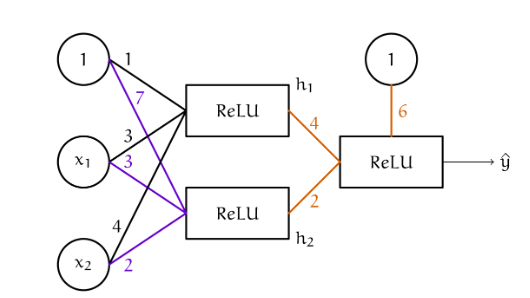


Эта архитектура может быть визуализирована в виде сети с входным слоем, двумя скрытыми нейронами и одним выходным.












##4. Армия регрессий

Рассмотрим последовательность задач, связанных с использованием персептронов для решения различных логических и классификационных задач. Каждая задача иллюстрирует принципы настройки весов и активационных функций в простых нейронных сетях.





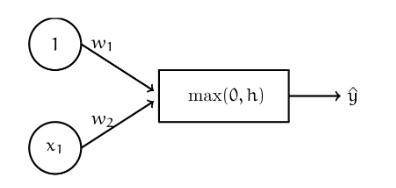

#### Часть (а): Реализация логического отрицания

Для реализации функции логического отрицания ($x_1 = 0 \rightarrow y = 1$, $x_1 = 1 \rightarrow y = 0$) используем следующий персептрон:  
$$
\hat{y} = \max(0, w_1 + w_2 \cdot x_1).
$$  

Условия для работы персептрона:  
$$
\max(0, w_1 + w_2 \cdot 1) = 0, \quad \max(0, w_1 + w_2 \cdot 0) = 1.
$$  

Из второго уравнения видно, что $w_2$ не влияет на результат при $x_1 = 0$, а $w_1 = 1$. Чтобы обеспечить выполнение первого уравнения, выбираем $w_2 \leq -1$. Таким образом, один из возможных наборов параметров — $w_1 = 1, w_2 = -1$.  





#### Часть (б): Обучение персептрона на нескольких примерах

Для реализации персептрона, который обрабатывает три входа ($x_1, x_2, x_3$) и выдает значения $y$, воспользуемся таблицей:  

| $x_1$ | $x_2$ | $x_3$ | $y$  |  
|--|--|--|-|  
| 1      | 1      | 2      | 0.5   |  
| 1      | -1     | 1      | 0     |  




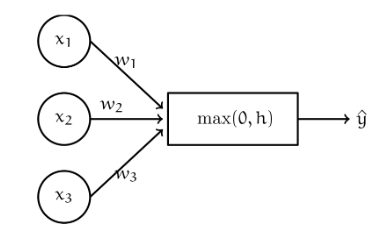


Функция активации представлена в виде:  
$$
\hat{y} = \max(0, w_1 + w_2 \cdot x_2 + w_3 \cdot x_3).
$$  

Для каждого из примеров составим уравнения:  
1. $\max(0, w_1 + w_2 + 2 \cdot w_3) = 0.5,$  
2. $\max(0, w_1 - w_2 + w_3) = 0.$  

Одно из возможных решений заключается в выборе $w_1 = 0$, $w_3 = 0$, $w_2 = 0.5$. Тогда оба уравнения выполняются: первое выдает 0.5, а второе переходит в отрицательную область, что приводит к $\hat{y} = 0$ из-за функции ReLU.



#### Часть (в): Классификация точек на плоскости




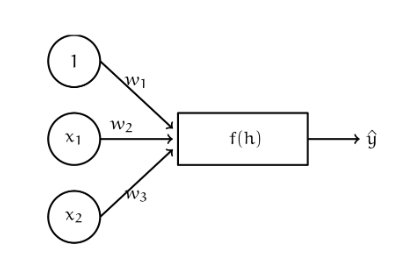

Дано два линейных разделителя на плоскости:  
$$
x_1 + x_2 = 1, \quad x_1 - x_2 = 1.
$$  
Необходимо построить нейронную сеть, которая будет классифицировать точки согласно заданным классам. В качестве функции активации используется функция Хевисайда ($f(h) = 1$, если $h > 0$; $f(h) = 0$, если $h \leq 0$).

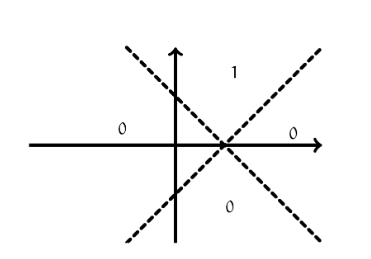


## Нейрон как Линейная Разделяющая Поверхность

Один нейрон можно представить как линию, проведенную на плоскости, которая отделяет один класс данных от другого. Например, уравнение линии вида $x_1 + x_2 - 1 = 0$ может быть описано с помощью нейрона.



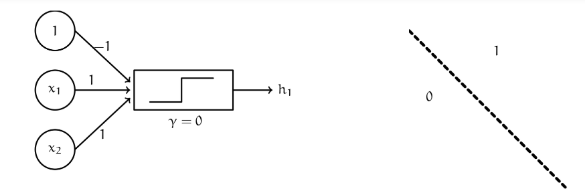


- Для первой линии ($x_1 + x_2 = 1$):  
  $$
  h_1 = f(w_1 \cdot x_1 + w_2 \cdot x_2 - \gamma), \quad w_1 = 1, w_2 = 1, \gamma = 1.
 $$



Порог $\gamma$ для кусочной функции в определенном смысле дублирует константу. Эти два параметра взаимосвязаны, и в нашем анализе мы будем всегда считать его равным нулю. Если комбинация $x_1$, $x_2$ и 1 оказывается больше нуля, это указывает на то, что мы находимся справа от прямой. В случае необходимости поменять метки 0 и 1 местами, достаточно умножить все коэффициенты на -1.



Персептрон способен определить, по какую сторону от прямой мы находимся, задавая таким образом одну линейную разделяющую поверхность. Аналогично, для второй прямой мы можем получить следующий нейрон.


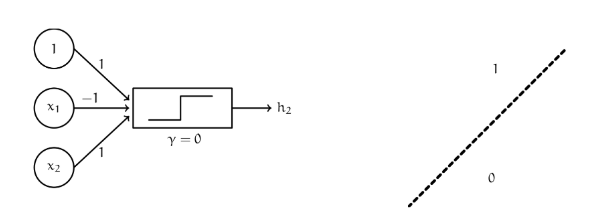


Таким образом, первый персептрон определяет позицию относительно первой прямой, а второй — относительно второй. Далее необходимо объединить полученные результаты. Нейрон для логической операции «И» должен реализовать соответствующую логическую функцию, которую задает таблица истинности (см. рисунок ниже). В этой таблице также приведены примеры весов, которые могли бы объединить выходные данные первого слоя в итоговый прогноз.


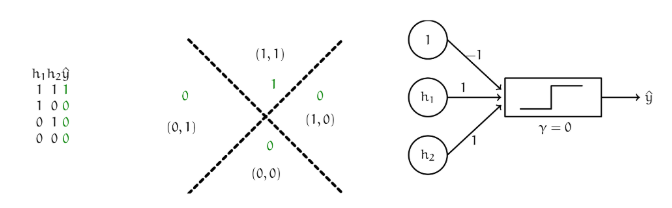

- Для второй линии ($x_1 - x_2 = 1$):  
  $$
  h_2 = f(w_1 \cdot x_1 + w_2 \cdot x_2 - \gamma), \quad w_1 = 1, w_2 = -1, \gamma = 1.
 $$



Теперь мы можем визуализировать итоговую нейронную сеть, решающую задачу классификации. Она состоит из двух слоев, так как каждый персептрон строит только одну разделяющую линию.

Если бы мы ввели дополнительный признак $x_1 \cdot x_2$, то смогли бы обойтись всего одним персептроном. В нашем случае нейронная сеть самостоятельно создала на первом слое признак, которого ей не хватало для решения задачи. Иными словами, первый слой нейронной сети преобразовал сложное пространство признаков в более простое, а затем второй слой решил задачу классификации в этом упрощенном пространстве.


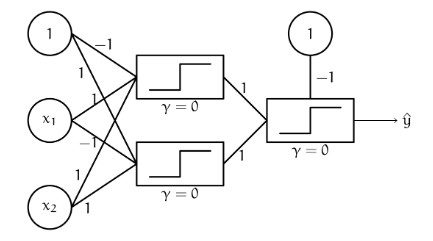


Таким образом, мы рассмотрели основные принципы работы нейронов и персептронов, а также их применение в нейронных сетях для решения задач классификации. В дальнейшем мы будем углубляться в изучение более сложных архитектур и алгоритмов, которые позволяют эффективно решать разнообразные задачи в области машинного обучения.























#### Дополнительное замечание

Если ввести дополнительный признак $z = x_1 \cdot x_2$, можно обойтись одним персептроном, который будет описывать задачу классификации с помощью одной функции активации. Такой персептрон может быть задан уравнением:  
$$
\hat{y} = f(w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot z - \gamma),
$$  
где $z = x_1 \cdot x_2$, а $f(h)$ — активационная функция (например, функция Хевисайда).

Этот подход позволяет напрямую учитывать нелинейные взаимодействия между $x_1$ и $x_2$, которые не могли быть представлены в линейном виде. Таким образом, обучение включает настройку весов $w_1, w_2, w_3$ и порога $\gamma$ для получения правильной классификации.  

Если же дополнительный признак не вводить, то нейросеть решает задачу в два этапа:
1. На первом слое преобразует исходное пространство ($x_1, x_2$) в более сложное представление, добавляя скрытые признаки.  
2. На втором слое производит финальную классификацию с учётом нового представления признаков.  

Это демонстрирует способность нейронных сетей самостоятельно создавать необходимые признаки для эффективного решения задачи.








##5. Логические функции и их реализация нейронными сетями

#### Постановка задачи
Рассматриваются логические функции, заданные таблицами истинности, где два входных столбца ($x_1$ и $x_2$) приводят к одному выходному ($y$).

### Основные логические операции

Логические функции могут быть заданы через таблицы истинности. Рассмотрим три основные операции:

1. **Логическое «И» (AND)**: Эта операция возвращает истину (1) только тогда, когда оба входа истинны.
2. **Логическое «ИЛИ» (OR)**: Эта операция возвращает истину, если хотя бы один из входов истинен.
3. **Исключающее ИЛИ (XOR)**: Эта операция возвращает истину, когда входы различны, то есть один из входов истинен, а другой — ложен.

### Таблицы истинности

Для наглядности представим таблицы истинности для каждой из операций:

| Вход 1 (x1) | Вход 2 (x2) | AND (x1 ∧ x2) | OR (x1 ∨ x2) | XOR (x1 ⊕ x2) |
|-------------|-------------|---------------|--------------|----------------|
| 0           | 0           | 0             | 0            | 0              |
| 0           | 1           | 0             | 1            | 1              |
| 1           | 0           | 0             | 1            | 1              |
| 1           | 1           | 1             | 1            | 0              |



Операция XOR эквивалентна утверждению $x_1 \neq x_2$, которое можно выразить с использованием индикатора (скобки Айверсона):  

$$
[x_1 \neq x_2] =
\begin{cases}
1, & \text{если } x_1 \neq x_2, \\
0, & \text{если } x_1 = x_2.
\end{cases}
$$

Скобка Айверсона позволяет выразить любую булевую функцию через аналитическое выражение. Например, единичная ступенька (функция Хевисайда $f(h)$) может быть записана как:

$$
f(h) = [h > 0].
$$

В предыдущем упражнении мы уже построили нейрон для пересечения. Он располагался на последнем слое нейросети. Посмотрим на тот же нейрон под другим углом.




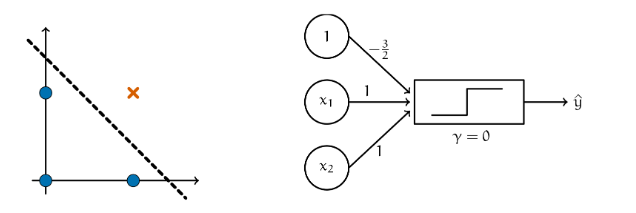

**1. Логическое "И" (AND):**  
Для логического пересечения $AND$ необходимо отделить точку $(1,1)$ от остальных на плоскости. Это можно сделать с помощью прямой, например, $x_2 = 1.5 - x_1$. Пропустив точки через функцию:

$$
y = [w_1 x_1 + w_2 x_2 - \gamma > 0],
$$

проверяем её корректность:  
$$
\begin{aligned}
&[1 \cdot 1 + 1 \cdot 1 - 1.5 > 0] = [0.5 > 0] = 1, \\
&[1 \cdot 0 + 1 \cdot 0 - 1.5 > 0] = [-1.5 > 0] = 0, \\
&[1 \cdot 0 + 1 \cdot 1 - 1.5 > 0] = [-0.5 > 0] = 0, \\
&[1 \cdot 1 + 1 \cdot 0 - 1.5 > 0] = [-0.5 > 0] = 0.
\end{aligned}
$$

Это подтверждает, что пересечение реализовано корректно.

**2. Логическое "ИЛИ" (OR):**  
Для объединения $OR$ линия на плоскости должна отделить точку $(0,0)$ от остальных. Пример подходящей линии: $x_2 = 0.5 - x_1$. Пропуск точек через функцию аналогичен, с проверкой, что результат соответствует таблице истинности "ИЛИ".




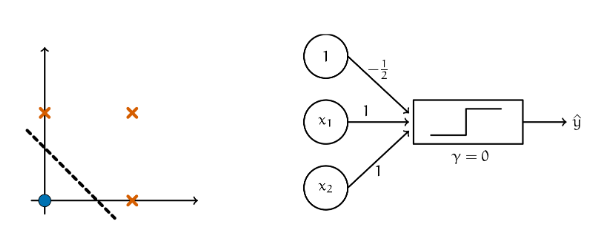



**3. Исключающее "ИЛИ" (XOR):**  
Для разделения точек, принадлежащих XOR, требуется две линии. Например, одна линия может разделять $(0,0)$ и $(1,1)$, другая — $(0,1)$ и $(1,0)$. Таким образом, первый слой нейросети определяет позицию относительно каждой из линий, а второй слой объединяет эти результаты.  


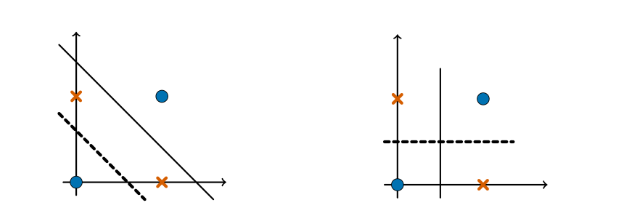


Функция XOR может быть записана через пересечение ($\cap$) и объединение ($\cup$) как:  
$$
\hat{y} = [1 \cdot (x_1 \cup x_2) - 1 \cdot (x_1 \cap x_2) - 0.5 > 0].
$$

Здесь:  
- $x_1 \cup x_2$ — нейрон, определяющий принадлежность к области выше линии для объединения.  
- $x_1 \cap x_2$ — нейрон, отвечающий за пересечение точек.  

#### Итоговая структура нейросети для XOR
Для реализации XOR требуется двухслойная нейросеть:  
1. **Первый слой:** определяет позиции относительно линий, соответствующих $(x_1 \cup x_2)$ и $(x_1 \cap x_2)$.  
2. **Второй слой:** объединяет эти результаты, реализуя логику XOR.  

Важно отметить, что без дополнительного признака (например, $z = x_1 \cdot x_2$) минимальная архитектура сети состоит из двух слоёв. Если такой признак вводится, задачу можно решить с помощью одного персептрона.











##6. Реализация XOR с использованием дополнительного признака

#### Постановка задачи
Для реализации операции "исключающее ИЛИ" (XOR) стандартными методами требуется несколько персептронов, что связано с невозможностью разделить области, соответствующие разным выходным значениям, одной линейной границей. Это объясняется отсутствием признаков, позволяющих эффективно разделить точки.

#### Добавление нового признака
Для упрощения задачи предлагается вручную добавить новый признак $x_3 = x_1 \cdot x_2$. Это позволяет нейросети использовать дополнительную информацию о взаимодействии входных переменных и реализовать XOR с помощью одного персептрона.

Формула для выходного значения:
$$
\hat{y} = [x_1 + x_2 - 2 \cdot x_1 \cdot x_2 - 0.5 > 0].
$$
Такая линия как раз будет задавать две скрещивающиеся прямые.


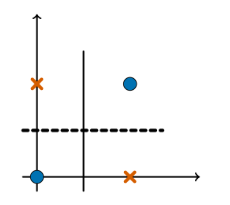


#### Геометрическая интерпретация
Линия, задаваемая формулой:
$$
x_1 + x_2 - 2 \cdot x_1 \cdot x_2 - 0.5 = 0,
$$
описывает пересечение двух прямых. Преобразуем уравнение для более наглядного вида:

1. Умножим уравнение на 2:
   $$
   2x_1 + 2x_2 - 4x_1x_2 - 1 = 0.
   $$

2. Группируем переменные:
   $$
   2x_1(1 - 2x_2) + 2x_2 - 1 = 0.
   $$

3. Разделяем выражение на множители:
   $$
   (1 - 2x_2)(2x_1 - 1) = 0.
   $$

Из этого уравнения получаем две прямые:
- $x_2 = 0.5$,
- $x_1 = 0.5$.

#### Интерпретация результата
Добавление признака $x_3 = x_1 \cdot x_2$ позволило задать границы, необходимые для разделения точек, с помощью одной линии, описанной двумя прямыми $x_1 = 0.5$ и $x_2 = 0.5$. Это демонстрирует, что включение нелинейного признака может существенно упростить задачу, минимизируя архитектуру нейросети.

#### Вывод
Добавление нового признака на этапе входных данных помогает обойти ограничение линейности одного персептрона, выполняя часть работы нейросети вручную. Этот подход иллюстрирует принцип построения глубокой архитектуры: первые слои создают сложные признаки, на основе которых последующие слои решают задачу классификации или регрессии.












##7. Минимальное количество нейронов для решения задач классификации

#### Постановка проблемы
Рассмотрим четыре задачи классификации, каждая из которых имеет свою геометрическую интерпретацию. Цель — определить минимальное количество нейронов, необходимое для их решения с использованием многослойной нейронной сети.



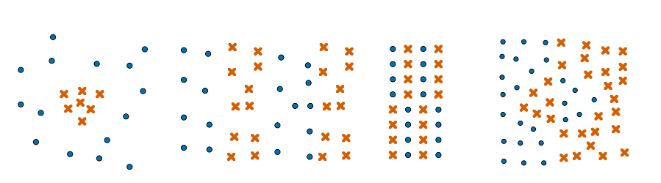



#### Задача 1: Классификация внутри треугольника
Необходимо выделить область внутри треугольника. Внутренние точки относятся к классу 1, а внешние — к классу 0.

**Решение:**
1. Первый слой сети строит три прямые линии, ограничивающие треугольник. Каждую линию описывает отдельный нейрон.
2. Если точка находится внутри треугольника, все три нейрона выдают 1.
3. На втором слое используется один нейрон, который проверяет, что все три значения равны 1, выдавая 1 для точки внутри треугольника и 0 — для остальных.

**Итог:** Всего 4 нейрона — три на первом слое и один на втором.



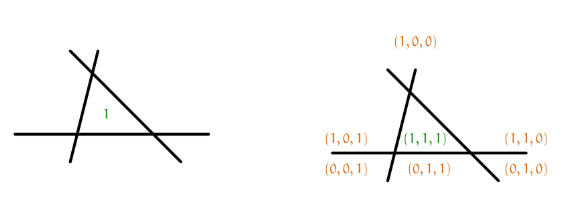



#### Задача 2: Определение положения относительно полос
Необходимо построить три полосы, каждая из которых задаётся двумя линиями. Решение зависит от того, в какой из полос находится точка.


Первый слой должен построить нам три линии. Это три нейрона. Второй слой должен принять решение в какой из полос мы оказались. Будем считать, что если мы попали направо, нейрон выдаёт единицу. Если мы попали налево, ноль. В качестве функции активации используем единичную ступеньку.


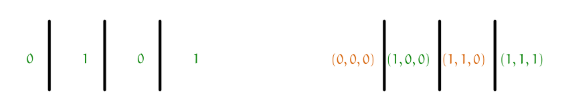

Вопрос в том, хватит ли нам на втором слое одного нейрона для того, чтобы обработать все четыре возможные ситуации. Нам нужно, чтобы выполнялись следующие условия:
   $$
   \begin{cases}
   f(w_1 \cdot 1 + w_2 \cdot 1 + w_3 \cdot 1) = 1, \\
   f(w_1 \cdot 1 + w_2 \cdot 0 + w_3 \cdot 0) = 1, \\
   f(w_1 \cdot 1 + w_2 \cdot 1 + w_3 \cdot 0) = 0, \\
   f(w_1 \cdot 0 + w_2 \cdot 0 + w_3 \cdot 0) = 0.
   \end{cases}
   $$

Для выполнения условий можно выбрать веса, например: $w_1 = 1$, $w_2 = -2$, $w_3 = 4$.

**Итог:** Всего 4 нейрона — три на первом слое и один на втором.





#### Задача 3: Две задачи XOR, расположенные рядом
3) Оценим число нейронов сверху. Перед нами две XoR задачи, которые лежат рядом с друг-другом. Для решения каждой надо 3 нейрона. Чтобы объединить получившиеся решения нужен ещё один нейрон. Получается трёхслойная сетка с 7 нейронами.
Если мы попробуем подойти к задаче также, как в предыдущем пункте, на втором слое мы получим несовместимую систему из уравнений. То есть третьего слоя точно не избежать.
Можно первым слоем построить 3 линии, вторым решить задачу из предыдущего пункта, а на третьем добавить информацию о том, выше горизонтальной линии мы оказались или ниже. Тогда мы потратим 6 нейронов. Нейросетка получится неполносвязной.




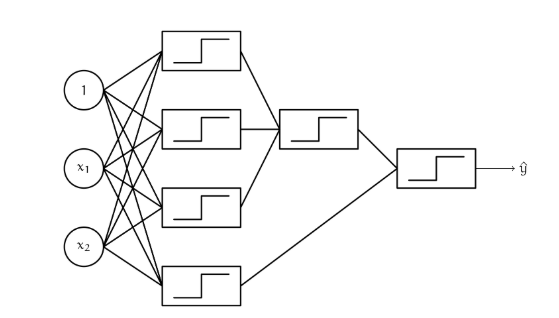


**Итог:**
- Минимальное число нейронов: 6 (неполносвязная сеть).
- Полносвязная сеть потребует 7 нейронов.



#### Выводы
Оптимизация числа нейронов зависит от постановки задачи и свойств сети:
1. В задаче классификации внутри треугольника потребовалось 4 нейрона.
2. Для полос — также 4 нейрона.
3. Для двух XOR задач минимально возможно 6 нейронов.

Каждая задача иллюстрирует, как геометрическое представление помогает определить минимальную архитектуру сети. Решение сложных задач требует учёта всех возможных взаимодействий между признаками, что может потребовать дополнительных слоёв и нейронов.







